### This very simple notebook will take a blood pressure reading log (the provided example data is produced by an OMRON Smart X reader), allocate the readings to three sections of the day (AM, MID and PM) and draw a boxplot to perform a first rough estimate about the presence of a trend.

With the data provided for instance you can form the hypothesis that the pressure in the afternoon/evening is better that in the morning/central part of the day and for instance you could act shifting the time of your pressure medication from the evening to the morning to better control the daily values.

Import needed libraries

In [18]:
import pandas as pd
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import matplotlib.pyplot as plt

Set the (arbitrary) limits to divide the day in an AM, MID(day) and PM areas and the name of data file

In [2]:
AM_LIMIT = 10
PM_LIMIT = 16
LOGNAME = 'data/bp_log.csv'
# LOGNAME = '../input/blood-pressure-readings/bp_log.csv' # on Kaggle
# https://www.kaggle.com/rjalexander/blood-pressure-circadian

Define a function to generate a "partofday" categorical label based on the hour of the blood pressure reading and the limits we set above

In [3]:
def partofday(hour):
    if hour <= AM_LIMIT:
        return 'AM'
    elif hour > AM_LIMIT and hour <= PM_LIMIT:
        return 'MID'
    else:
        return 'PM'

Read and take a peek at the data as read in a dataframe

In [4]:
df = pd.read_csv(LOGNAME)
df.head()

,Measurement Date,Time Zone,SYS,DIA,Pulse,Device Model Name
0,2021-06-24 19:01,Europe/Rome,102,69,82,HEM-7361T_ESL
1,2021-06-24 19:05,Europe/Rome,93,71,80,HEM-7361T_ESL
2,2021-06-25 8:20,Europe/Rome,112,70,66,HEM-7361T_ESL
3,2021-06-26 11:53,Europe/Rome,107,75,88,HEM-7361T_ESL
4,2021-06-28 17:25,Europe/Rome,102,69,89,HEM-7361T_ESL


Add a new "partofday" categorical new column in the dataframe

In [5]:
df['partofday'] = df.apply(lambda row: partofday(pd.to_datetime(row['Measurement Date']).hour), axis=1)

Now plot the SYS(tolic) and then the DIA(stolic) pressure values divided in the three sections of the day

In [6]:
sns.set_theme(style="whitegrid")

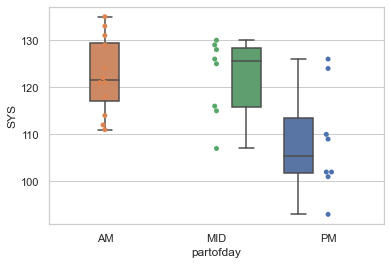

In [7]:
ax = sns.boxplot(x=df["partofday"], y=df["SYS"],hue=df["partofday"],data=df, order=["AM","MID","PM"])
ax = sns.swarmplot(x=df["partofday"], y=df["SYS"],hue=df["partofday"],data=df, order=["AM","MID","PM"])
ax.legend_.remove()

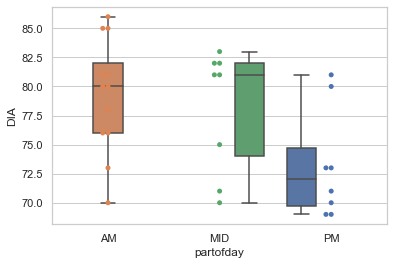

In [8]:
ax = sns.boxplot(x=df["partofday"], y=df["DIA"],hue=df["partofday"],data=df, order=["AM","MID","PM"])
ax = sns.swarmplot(x=df["partofday"], y=df["DIA"],hue=df["partofday"],data=df, order=["AM","MID","PM"])
ax.legend_.remove()

Now let's perform a t-test to see if there's a statistically significant difference in the average BP between AM and PM

In [9]:
stats.ttest_ind(df['SYS'][df['partofday'] == 'AM'], df['SYS'][df['partofday'] == 'PM'])

Ttest_indResult(statistic=3.2485604398802854, pvalue=0.004459530488013578)

In [10]:
stats.ttest_ind(df['DIA'][df['partofday'] == 'AM'], df['DIA'][df['partofday'] == 'PM'])

Ttest_indResult(statistic=2.70927610094476, pvalue=0.014365727342797435)

Now let's perform a t-test to see if there's a statistically significant difference in the average BP between AM and MIDday

In [11]:
stats.ttest_ind(df['SYS'][df['partofday'] == 'AM'], df['SYS'][df['partofday'] == 'MID'])

Ttest_indResult(statistic=0.1560756034964022, pvalue=0.8777105237106861)

In [12]:
stats.ttest_ind(df['DIA'][df['partofday'] == 'AM'], df['DIA'][df['partofday'] == 'MID'])

Ttest_indResult(statistic=0.4859149723191154, pvalue=0.6328899681096911)

### Conclusion: from this initial assessment of the data you could hypothesize that the pressure is better (lower) in the afternoon/evening and therefore reccomend the patient to take her medication in the morning as opposed to the evening. The difference between AM and MIDday is not significant.

### Let's now plot the BP values and see what's the temporal trend in time

Now let's convert the 'Measurement Date' string to a 'timestamp' datetime value and set it as the dataframe index

In [13]:
df['timestamp'] = pd.to_datetime(df['Measurement Date'])

In [14]:
df.set_index('timestamp')

,Measurement Date,Time Zone,SYS,DIA,Pulse,Device Model Name,partofday
timestamp,,,,,,,
2021-06-24 19:01:00,2021-06-24 19:01,Europe/Rome,102,69,82,HEM-7361T_ESL,PM
2021-06-24 19:05:00,2021-06-24 19:05,Europe/Rome,93,71,80,HEM-7361T_ESL,PM
2021-06-25 08:20:00,2021-06-25 8:20,Europe/Rome,112,70,66,HEM-7361T_ESL,AM
2021-06-26 11:53:00,2021-06-26 11:53,Europe/Rome,107,75,88,HEM-7361T_ESL,MID
2021-06-28 17:25:00,2021-06-28 17:25,Europe/Rome,102,69,89,HEM-7361T_ESL,PM
2021-06-28 19:52:00,2021-06-28 19:52,Europe/Rome,101,70,93,HEM-7361T_ESL,PM
2021-06-29 08:11:00,2021-06-29 8:11,Europe/Rome,114,73,71,HEM-7361T_ESL,AM
2021-06-30 20:49:00,2021-06-30 20:49,Europe/Rome,126,80,77,HEM-7361T_ESL,PM
2021-07-03 08:34:00,2021-07-03 8:34,Europe/Rome,121,80,64,HEM-7361T_ESL,AM


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Measurement Date   28 non-null     object        
 1   Time Zone          28 non-null     object        
 2   SYS                28 non-null     int64         
 3   DIA                28 non-null     int64         
 4   Pulse              28 non-null     int64         
 5   Device Model Name  28 non-null     object        
 6   partofday          28 non-null     object        
 7   timestamp          28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 1.9+ KB
None


Now plot the two scatter graphs using timestamp as the time-series x value ... why doesn't it work? Why does it use the "old" numerical progression original index?

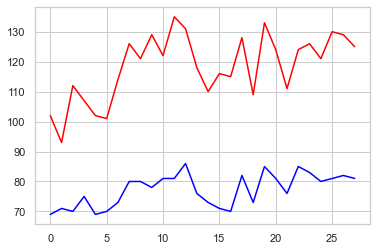

In [16]:
ax1 = df.SYS.plot(color='red', grid=True, label='SYS')
ax2 = df.DIA.plot(color='blue', grid=True, label='DIA')


Now the following using seaborn works a lot better, but why doesn't it show the legend?

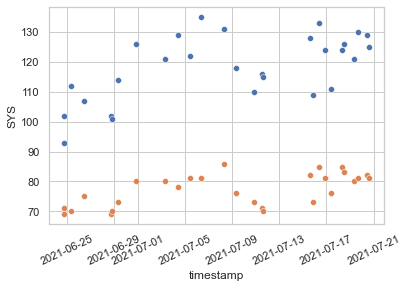

In [22]:
sns.scatterplot(x="timestamp", y="SYS", data=df, palette=palette, legend='full')
sns.scatterplot(x="timestamp", y="DIA", data=df, palette=palette, legend='full')
plt.xticks(rotation=25)
plt.show()

Next would be fitting a linear regression line on the two series but still learning howto :)